In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from glob import glob

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#### Exploratory Data Analysis
1. Distribution of Status
 - Pie Chart
2. What Distribution of size of all Images
 - Histogram
 - Box Plot
3. Make the decision of width & height to resize using above chart.
4. Remove the few images that are having very less size

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
epath = glob('/content/gdrive/MyDrive/AIL_project/traffic/Final Dataset/training/Empty/*.jpg')
lpath = glob('/content/gdrive/MyDrive/AIL_project/traffic/Final Dataset/training/Low/*.jpg')
mpath = glob('/content/gdrive/MyDrive/AIL_project/traffic/Final Dataset/training/Medium/*.jpg')
hpath = glob('/content/gdrive/MyDrive/AIL_project/traffic/Final Dataset/training/High/*.jpg')
tpath = glob('/content/gdrive/MyDrive/AIL_project/traffic/Final Dataset/training/Traffic Jam/*.jpg')

In [ ]:
df_empty = pd.DataFrame(epath,columns=['filepath'])
df_empty['status'] = 'empty'

df_low = pd.DataFrame(lpath,columns=['filepath'])
df_low['status'] = 'low'

df_medium = pd.DataFrame(mpath,columns=['filepath'])
df_medium['status'] = 'medium'

df_high = pd.DataFrame(hpath,columns=['filepath'])
df_high['status'] = 'high'

df_traffic_jam = pd.DataFrame(tpath,columns=['filepath'])
df_traffic_jam['status'] = 'jam'


df = pd.concat((df_empty, df_low, df_medium, df_high, df_traffic_jam),axis=0)

df.head()

,filepath,status
0,/content/gdrive/MyDrive/AIL_project/traffic/Fi...,empty
1,/content/gdrive/MyDrive/AIL_project/traffic/Fi...,empty
2,/content/gdrive/MyDrive/AIL_project/traffic/Fi...,empty
3,/content/gdrive/MyDrive/AIL_project/traffic/Fi...,empty
4,/content/gdrive/MyDrive/AIL_project/traffic/Fi...,empty


In [ ]:
df.tail()

,filepath,status
176,/content/gdrive/MyDrive/AIL_project/traffic/Fi...,jam
177,/content/gdrive/MyDrive/AIL_project/traffic/Fi...,jam
178,/content/gdrive/MyDrive/AIL_project/traffic/Fi...,jam
179,/content/gdrive/MyDrive/AIL_project/traffic/Fi...,jam
180,/content/gdrive/MyDrive/AIL_project/traffic/Fi...,jam


In [ ]:
df.shape

(3379, 2)

In [ ]:
def get_size(path):
    img = cv2.imread(path)
    return img.shape[0]

In [ ]:
df['dimension'] = df['filepath'].apply(get_size)

In [ ]:
df.head()

,filepath,status,dimension
0,/content/gdrive/MyDrive/AIL_project/traffic/Fi...,empty,360
1,/content/gdrive/MyDrive/AIL_project/traffic/Fi...,empty,360
2,/content/gdrive/MyDrive/AIL_project/traffic/Fi...,empty,480
3,/content/gdrive/MyDrive/AIL_project/traffic/Fi...,empty,480
4,/content/gdrive/MyDrive/AIL_project/traffic/Fi...,empty,240


#### Exploratory Data Analysis
1. Distribution of Status
 - Pie Chart
2. What Distribution of size of all Images
 - Histogram
 - Box Plot
3. Make the decision of width & height to resize using above chart.
4. Remove the few images that are having very less size

In [ ]:
dist_status = df['status'].value_counts()
dist_status

empty     1186
low        946
medium     688
high       378
jam        181
Name: status, dtype: int64

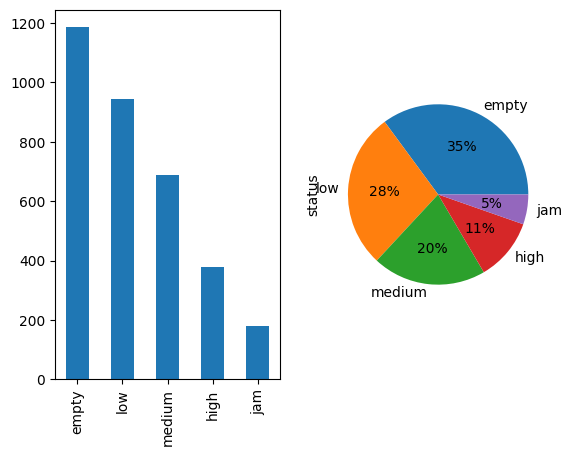

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=2)
dist_status.plot(kind='bar',ax=ax[0])
dist_status.plot(kind='pie',ax=ax[1],autopct='%0.0f%%')
plt.show()

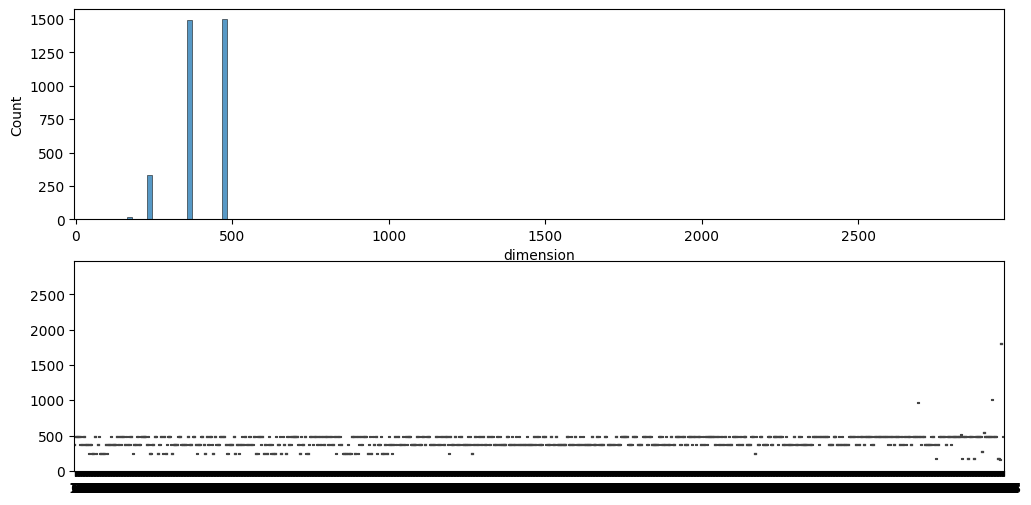

In [ ]:
# What Distribution of size of all Images
# Histogram
# Box Plot
# Split by “Status”
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
sns.histplot(df['dimension'])
plt.subplot(2,1,2)
sns.boxplot(df['dimension'])
plt.show()

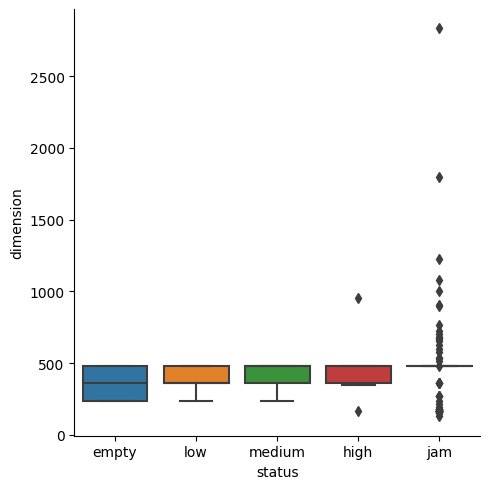

In [ ]:
sns.catplot(data=df,x='status',y='dimension',kind='box')

1. We have almost equal distrbution of Status (numbers)
2. Most of the images are having dimension more than 250

---
- **Consider the image with dimensions more than 250**
- **Resize all the the image into 300 x 300**

In [ ]:
df_filter = df.query('dimension > 250')
df_filter.shape

(3020, 3)

In [ ]:
df_filter['status'].value_counts(normalize=True)

low       0.305629
empty     0.292053
medium    0.227152
high      0.124834
jam       0.050331
Name: status, dtype: float64

#### Structure the image
- 300 x 300

In [ ]:
def structuring(path):
    try:

        # step - 1: read image
        img = cv2.imread(path) # BGR
        # step - 2: convert into grayscale
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        # step -3: resize into 300 x 300 array

        size = gray.shape[0]
        if size >= 100:
            # cv2.INTER_AREA (SHINK)
            gray_resize = cv2.resize(gray,(300,300),cv2.INTER_AREA)
        else:
            # cv2.INTER_CUBIC (ENLARGE)
            gray_resize = cv2.resize(gray,(300,300),cv2.INTER_CUBIC)

        # step -4: Flatten Image
        flatten_image = gray_resize.flatten()
        return flatten_image

    except:
        return None

In [ ]:
df_filter['data'] = df_filter['filepath'].apply(structuring) # convert all images into 300 x 300
df_filter.head()

,filepath,status,dimension,data
0,/content/gdrive/MyDrive/AIL_project/traffic/Fi...,empty,360,"[255, 255, 255, 255, 255, 255, 255, 253, 253, ..."
1,/content/gdrive/MyDrive/AIL_project/traffic/Fi...,empty,360,"[255, 255, 255, 255, 255, 255, 255, 253, 253, ..."
2,/content/gdrive/MyDrive/AIL_project/traffic/Fi...,empty,480,"[128, 134, 134, 128, 132, 134, 128, 123, 110, ..."
3,/content/gdrive/MyDrive/AIL_project/traffic/Fi...,empty,480,"[253, 253, 254, 254, 254, 254, 254, 254, 252, ..."
6,/content/gdrive/MyDrive/AIL_project/traffic/Fi...,empty,480,"[195, 210, 209, 208, 206, 206, 207, 206, 206, ..."


In [ ]:
data = df_filter['data'].apply(pd.Series)
data.columns = [f"pixel_{i}" for i in data.columns]
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_89990,pixel_89991,pixel_89992,pixel_89993,pixel_89994,pixel_89995,pixel_89996,pixel_89997,pixel_89998,pixel_89999
0,255,255,255,255,255,255,255,253,253,253,...,140,139,134,135,133,136,247,169,125,129
1,255,255,255,255,255,255,255,253,253,253,...,54,63,64,60,65,65,52,53,57,58
2,128,134,134,128,132,134,128,123,110,102,...,94,94,92,91,91,93,94,93,92,91
3,253,253,254,254,254,254,254,254,252,252,...,101,100,96,100,99,96,96,100,99,99
6,195,210,209,208,206,206,207,206,206,206,...,82,71,119,163,156,154,156,159,102,98


# Data Normalization

In [ ]:
# since for 8 bit image max value is 255
# therefore we are dividing each and every pixel with 255
data = data/255.0
data['status'] = df_filter['status']
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_89991,pixel_89992,pixel_89993,pixel_89994,pixel_89995,pixel_89996,pixel_89997,pixel_89998,pixel_89999,status
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,...,0.545098,0.525490,0.529412,0.521569,0.533333,0.968627,0.662745,0.490196,0.505882,empty
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,...,0.247059,0.250980,0.235294,0.254902,0.254902,0.203922,0.207843,0.223529,0.227451,empty
2,0.501961,0.525490,0.525490,0.501961,0.517647,0.525490,0.501961,0.482353,0.431373,0.400000,...,0.368627,0.360784,0.356863,0.356863,0.364706,0.368627,0.364706,0.360784,0.356863,empty
3,0.992157,0.992157,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.988235,0.988235,...,0.392157,0.376471,0.392157,0.388235,0.376471,0.376471,0.392157,0.388235,0.388235,empty
6,0.764706,0.823529,0.819608,0.815686,0.807843,0.807843,0.811765,0.807843,0.807843,0.807843,...,0.278431,0.466667,0.639216,0.611765,0.603922,0.611765,0.623529,0.400000,0.384314,empty


In [ ]:
data.shape

(3020, 90001)

# Save the Data

In [ ]:
import pickle

In [ ]:
pickle.dump(data,open('/content/gdrive/MyDrive/AIL_project/data/data_images_300_300.pickle',mode='wb'))

# END